In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1D problem

In [48]:
a = np.array([[-4, 2, 0], [-1, 1, 1], [0, 2, 1]])
b = np.array([10, 4.75, 20])
x = np.linalg.solve(a, b)

In [49]:
x

array([ 3.41666667, 11.83333333, -3.66666667])

In [54]:
x1 = np.linspace(0, 1, 1000)
x2 = np.linspace(1, 2, 1000)
u1 = -1.25*x1**2 + 41 / 12 * x1 + 1
u2 = -5*x2**2 +  71 / 6* x2 - 11 / 3

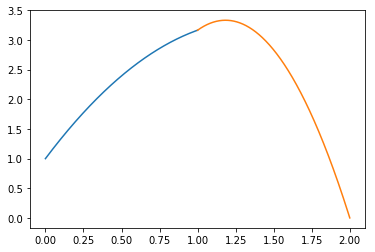

In [55]:
plt.plot(x1, u1)
plt.plot(x2, u2)

In [36]:
import sympy as sp

In [58]:
x = sp.symbols('x')

In [59]:
u1s = -1.25*x**2 + 41 / 12 * x + 1
u2s = -5*x**2 +  71 / 6* x - 11 / 3

In [60]:
du1dx = sp.diff(u1s, x)
du2dx = sp.diff(u2s, x)

In [61]:
du1dx

-2.5*x + 3.41666666666667

In [62]:
du1dx.subs(x, 1)

0.916666666666667

In [63]:
du2dx.subs(x, 1)

1.83333333333333

In [64]:
print(u1s.subs(x, 1))
print(u2s.subs(x,1))

3.16666666666667
3.16666666666667


In [109]:
h = np.array([.1, .05, .025, .0125])
my_u1 = np.array([4.99e-2, 2.45e-2, 1.21e-2, 6.04e-3])
my_u2 = np.array([5.55e-2, 2.59e-2, 1.25e-2, 6.13e-3])
# Penalty = 1e4
yaqi_u1_1e4 = np.array([2.14e-3, 5.83e-4, 1.95e-4, 1.0e-4])
yaqi_u2_1e4 = np.array([8.21e-3, 1.96e-3, 4.05e-4, 7.10e-5])
# Penalty = 1e2
yaqi_u1_1e2 = np.array([ 8.83e-3, 7.41e-3, 7.08e-3, 6.99e-3])
yaqi_u2_1e2 = np.array([ 7.90e-3, 1.22e-2, 1.35e-2, 1.38e-2])
# Penalty 1e6
yaqi_u1_1e6 = np.array([2.08e-3, 5.21e-4, 1.31e-4, 3.32e-5])
yaqi_u2_1e6 = np.array([8.33e-3, 2.08e-3, 5.20e-4, 1.29e-4])

reform_u1 = np.array([9.80e-2, 4.86e-2, 2.42e-2, 1.21e-2])
reform_u2 = np.array([1.04e-1, 4.99e-2, 2.45e-2, 1.21e-2])

y_data = [reform_u1, reform_u2, 
          yaqi_u1_1e2, yaqi_u2_1e2,
          yaqi_u1_1e4, yaqi_u2_1e4, 
          yaqi_u1_1e6, yaqi_u2_1e6,
         ]

labels = ["matched_bc_u1", "matched_bc_u2", 
          "penalty_1e2_u1", "penalty_1e2_u2",
          "penalty_1e4_u1", "penalty_1e4_u2", 
          "penalty_1e6_u1", "penalty_1e6_u2"
         ]

Text(0,0.5,'log(L2Error)')

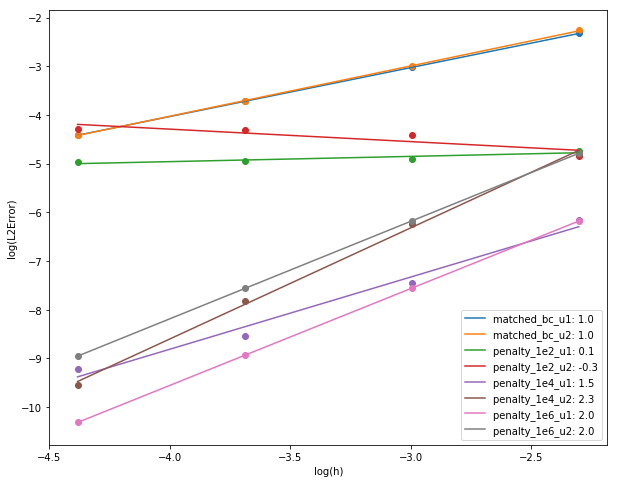

In [111]:
_, (ax) = plt.subplots(1, 1, figsize=(10, 8))
for y_datum, label in zip(y_data, labels):
    ax.scatter(np.log(h), np.log(y_datum))
    fit = np.polyfit(np.log(h), np.log(y_datum), 1)
    ax.plot(np.log(h), 
             np.poly1d(fit)(np.log(h)), 
             label=label + ": " + '%.1f' % fit[0])
ax.legend()
ax.set_xlabel("log(h)")
ax.set_ylabel("log(L2Error)")

# 2D Problem, use MMS, slowly varying function

Text(0,0.5,'log(L2Error)')

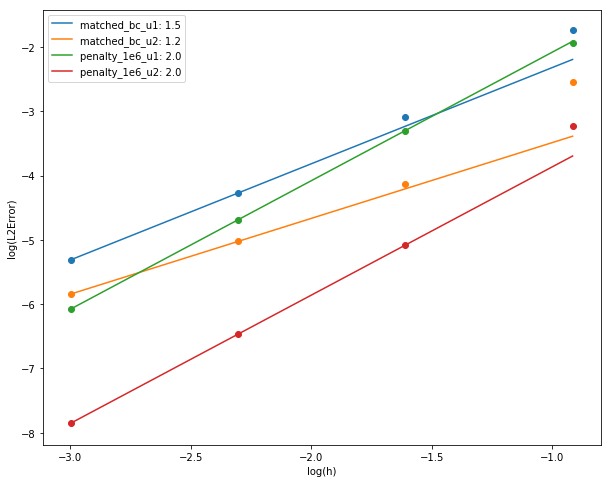

In [133]:
x, y = sp.symbols('x y')

u = sp.sin(.2 * x) + 3 * sp.cos(.4 * y) + 5 * sp.sin(.6 * x * y) + 7

f = -(sp.diff(sp.diff(u, x), x) + sp.diff(sp.diff(u, y), y))

h = np.array([.4, .2, .1, .05])
my_u1 = np.array([1.76e-1, 4.56e-2, 1.40e-2, 4.96e-3])
my_u2 = np.array([7.80e-2, 1.61e-2, 6.59e-3, 2.91e-3])
# Penalty = 1
yaqi_u1_1e0 = np.array([1.64e-1, 1.85e-1, 1.99e-1, 2.03e-1])
yaqi_u2_1e0 = np.array([4.96e-1, 3.42e-1, 3.38e-1, 3.37e-1])
# Penalty = 1e2
yaqi_u1_1e2 = np.array([1.42e-1, 3.51e-2, 7.91e-3, 2.99e-3])
yaqi_u2_1e2 = np.array([4.70e-2, 1.18e-2, 7.18e-3, 6.02e-3])
# Penalty = 1e4
yaqi_u1_1e4 = np.array([1.44e-1, 3.69e-2, 9.22e-3, 2.29e-3])
yaqi_u2_1e4 = np.array([3.98e-2, 6.23e-3, 1.62e-3, 4.46e-4])
# Penalty 1e6
yaqi_u1_1e6 = np.array([1.44e-1, 3.69e-2, 9.24e-3, 2.31e-3])
yaqi_u2_1e6 = np.array([3.97e-2, 6.23e-3, 1.56e-3, 3.91e-4])

y_data = [my_u1, my_u2, 
#           yaqi_u1_1e0, yaqi_u2_1e0,
#           yaqi_u1_1e2, yaqi_u2_1e2,
#           yaqi_u1_1e4, yaqi_u2_1e4, 
          yaqi_u1_1e6, yaqi_u2_1e6,
         ]

labels = ["matched_bc_u1", "matched_bc_u2", 
#           "penalty_1e0_u1", "penalty_1e0_u2",
#           "penalty_1e2_u1", "penalty_1e2_u2",
#           "penalty_1e4_u1", "penalty_1e4_u2", 
          "penalty_1e6_u1", "penalty_1e6_u2"
         ]

_, (ax) = plt.subplots(1, 1, figsize=(10, 8))
for y_datum, label in zip(y_data, labels):
    ax.scatter(np.log(h), np.log(y_datum))
    fit = np.polyfit(np.log(h[2:]), np.log(y_datum[2:]), 1)
    ax.plot(np.log(h), 
             np.poly1d(fit)(np.log(h)), 
             label=label + ": " + '%.1f' % fit[0])
ax.legend()
ax.set_xlabel("log(h)")
ax.set_ylabel("log(L2Error)")

# 2D Problem, use MMS, faster varying function

In [126]:
x, y = sp.symbols('x y')

u = sp.sin(2 * x) + 3 * sp.cos(4 * y) + 5 * sp.sin(6 * x * y) + 7

In [127]:
u

sin(2*x) + 5*sin(6*x*y) + 3*cos(4*y) + 7

In [128]:
f = -(sp.diff(sp.diff(u, x), x) + sp.diff(sp.diff(u, y), y))

In [129]:
f

180*x**2*sin(6*x*y) + 180*y**2*sin(6*x*y) + 4*sin(2*x) + 48*cos(4*y)

Text(0,0.5,'log(L2Error)')

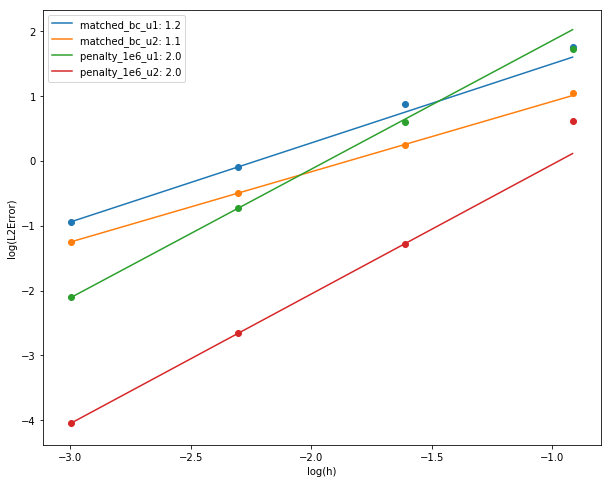

In [134]:
h = np.array([.4, .2, .1, .05])
my_u1 = np.array([5.76e0, 2.39e0, 9.10e-1, 3.91e-1])
my_u2 = np.array([2.85e0, 1.28e0, 6.08e-1, 2.87e-1])
# Penalty = 1
yaqi_u1_1e0 = np.array([5.86e0, 1.95e0, 9.41e-1, 8.47e-1])
yaqi_u2_1e0 = np.array([2.80e0, 8.35e-1, 9.21e-1, 9.47e-1])
# Penalty = 1e2
yaqi_u1_1e2 = np.array([5.62e0, 1.81e0, 4.80e-1, 1.23e-1])
yaqi_u2_1e2 = np.array([1.79e0, 2.68e-1, 6.63e-2, 2.52e-2])
# Penalty = 1e4
yaqi_u1_1e4 = np.array([5.62e0, 1.81e0, 4.82e-1, 1.22e-1])
yaqi_u2_1e4 = np.array([1.83e0, 2.77e-1, 7.02e-2, 1.76e-2])
# Penalty 1e6
yaqi_u1_1e6 = np.array([5.62e0, 1.81e0, 4.82e-1, 1.22e-1])
yaqi_u2_1e6 = np.array([1.83e0, 2.77e-1, 7.02e-2, 1.76e-2])

y_data = [my_u1, my_u2, 
#           yaqi_u1_1e0, yaqi_u2_1e0,
#           yaqi_u1_1e2, yaqi_u2_1e2,
#           yaqi_u1_1e4, yaqi_u2_1e4, 
          yaqi_u1_1e6, yaqi_u2_1e6,
         ]

labels = ["matched_bc_u1", "matched_bc_u2", 
#           "penalty_1e0_u1", "penalty_1e0_u2",
#           "penalty_1e2_u1", "penalty_1e2_u2",
#           "penalty_1e4_u1", "penalty_1e4_u2", 
          "penalty_1e6_u1", "penalty_1e6_u2"
         ]

_, (ax) = plt.subplots(1, 1, figsize=(10, 8))
for y_datum, label in zip(y_data, labels):
    ax.scatter(np.log(h), np.log(y_datum))
    fit = np.polyfit(np.log(h[2:]), np.log(y_datum[2:]), 1)
    ax.plot(np.log(h), 
             np.poly1d(fit)(np.log(h)), 
             label=label + ": " + '%.1f' % fit[0])
ax.legend()
ax.set_xlabel("log(h)")
ax.set_ylabel("log(L2Error)")